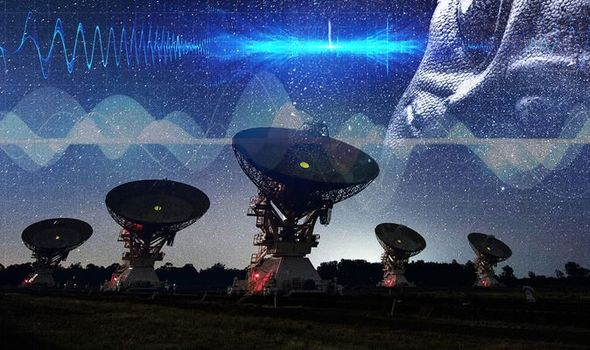

Source: [Canadian Astronomers](https://greatlakesledger.com/2019/08/20/canadian-astronomers-spotted-mysterious-radio-signals-from-outer-space-possibly-linked-to-alien-life/) 

## Introduction.

### What is [SETI](https://www.seti.org/)

- SETI stands for **Search for Extraterrestrial Intelligence** is a collective term for scientific searches for intelligent extraterrestrial life, for example, monitoring electromagnetic radiation for signs of transmissions from civilizations on other planets

- The SETI Institute is a not-for-profit research organization incorporated in 1984 whose mission is to explore, understand, and explain the origin and nature of life in the universe, and to apply the knowledge gained to inspire and guide present and future generations. It aims for discovery and for sharing knowledge as scientific ambassadors to the public, the press, and the government. SETI stands for the "search for extraterrestrial intelligence".

- Source: [SETI institute](https://en.wikipedia.org/wiki/SETI_Institute)

### Different classes in the Dataset.

- As these names are quite long I will categorize them as the following abbreviations. 

- `BrightPixel` : bp

- `NarrowBand` : nb

- `NarrowBandDRD` : nbd

- `Noise` : noise

- `Square Pulsed NarrowBand` : spnb

- `Squibble` : squ

- `Single Square Pulsed NarrowBand` : sspnb


In [31]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
from keras.layers import GlobalAveragePooling2D, Dropout,Activation
from keras.models import Model
# np.random.seed(2)

from keras.utils.np_utils import to_categorical

import itertools
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
train = "../input/seti-data/primary_small/train"

bp = "../input/seti-data/primary_small/train/brightpixel/"
nb = "../input/seti-data/primary_small/train/narrowband/"
nbd = "../input/seti-data/primary_small/train/narrowbanddrd/"
noise = "../input/seti-data/primary_small/train/noise/"
spnb = "../input/seti-data/primary_small/train/squarepulsednarrowband/"
squ = "../input/seti-data/primary_small/train/squiggle/"
sspnb = "../input/seti-data/primary_small/train/squigglesquarepulsednarrowband/"


bp_path = os.listdir(bp)
nb_path = os.listdir(nb)
nbd_path = os.listdir(nbd)
noise_path = os.listdir(noise)
spnb_path = os.listdir(spnb)
squ_path = os.listdir(squ)
sspnb_path = os.listdir(sspnb)

In [5]:
categories = [bp,nb,nbd,noise,spnb,squ,sspnb]
path = [bp_path,nb_path,nbd_path,noise_path,spnb_path,squ_path,sspnb_path]

titles = ["BrightPixel","NarrowBand","NarrowBandDRD","Noise","SPNB","Squibble","SSPNB"]

def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (400, 400))
    return image[...,::-1]

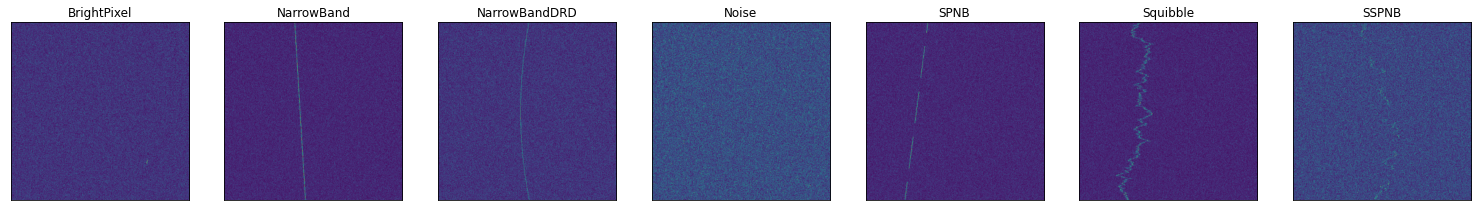

In [6]:
plt.figure(figsize = (30,30))
for i in range(7):
    plt.subplot(1,8,i+1)
    plt.imshow(load_img(categories[i] + path[i][1]))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (400, 400))
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     print(labels)
    return gray[...,::-1]

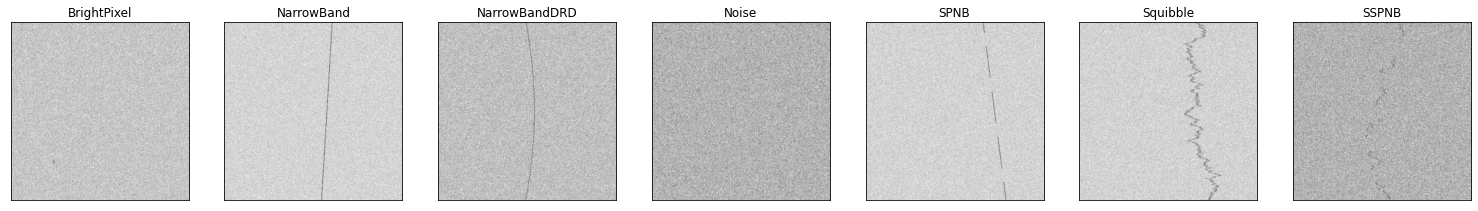

In [8]:
plt.figure(figsize = (30,30))
for i in range(7):
    plt.subplot(1,8,i+1)
    plt.imshow(load_img(categories[i] + path[i][1]), cmap="binary")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (400, 400))
#     gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(image,50,100, apertureSize=3)
    return edge[...,::-1]


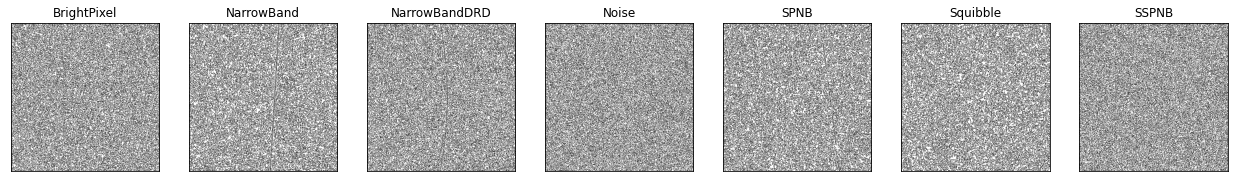

In [10]:
plt.figure(figsize = (25,25))
for i in range(7):
    plt.subplot(1,8,i+1)
    plt.imshow(load_img(categories[i] + path[i][1]), cmap="binary")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [11]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (400, 400))
#     gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     edge = cv2.Canny(image,50,100, apertureSize=3)
    blur = cv2.GaussianBlur(image,(5,5),0)
    return blur[...,::-1]


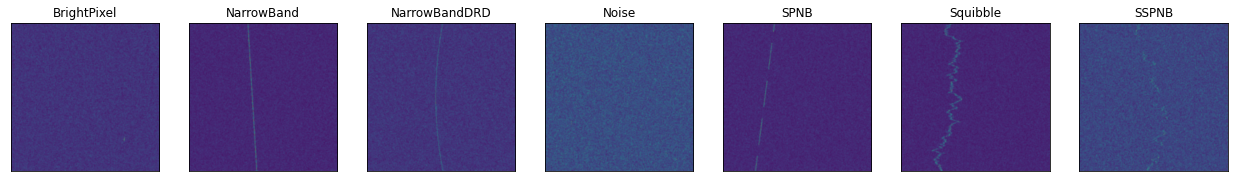

In [12]:
plt.figure(figsize = (25,25))
for i in range(7):
    plt.subplot(1,8,i+1)
    plt.imshow(load_img(categories[i] + path[i][1]), cmap="binary")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

### Let's try with dark background:

Credit: [Karthik Reddy](https://www.kaggle.com/karthikreddy25/seti-image-analysis-and-pre-processing)

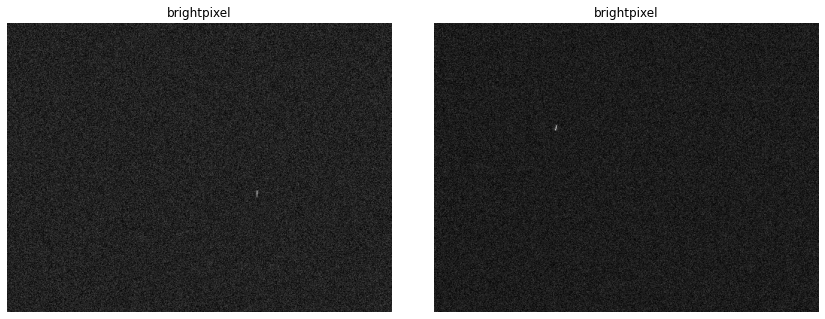

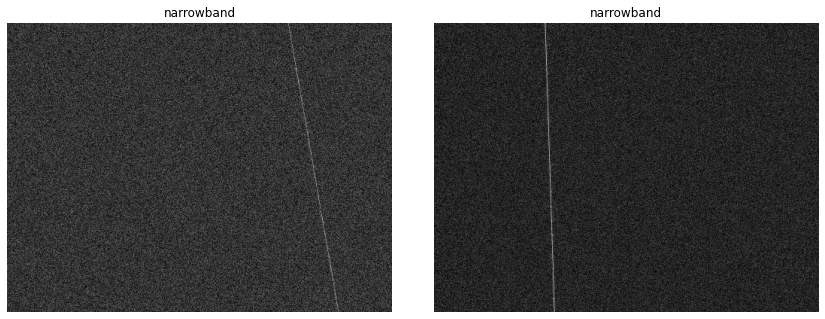

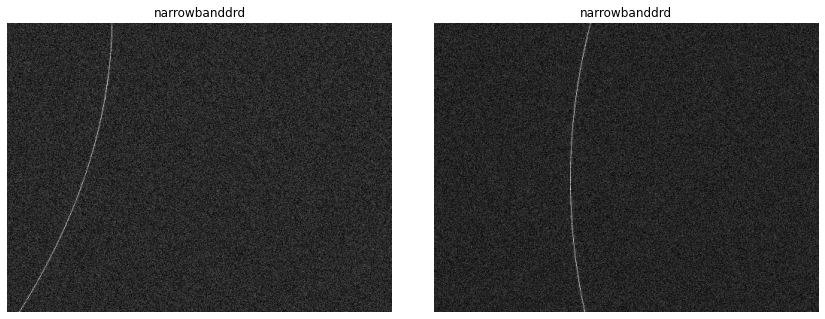

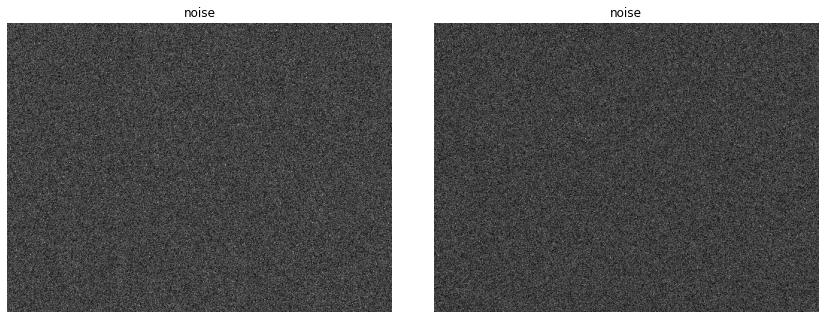

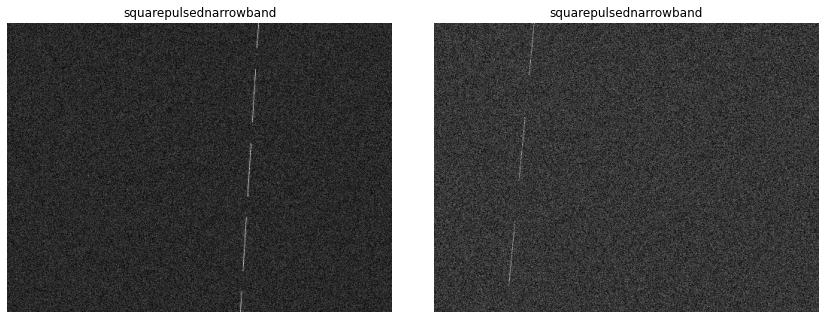

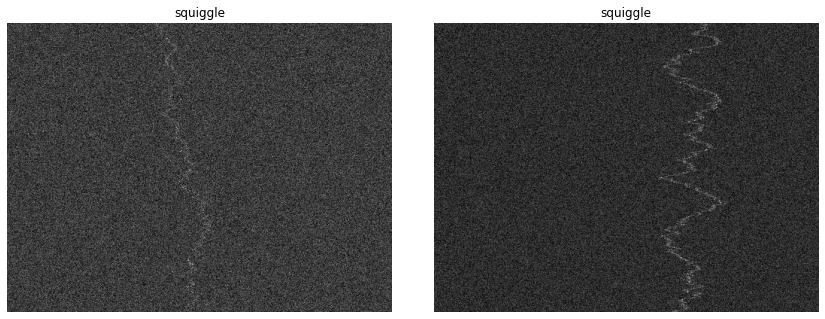

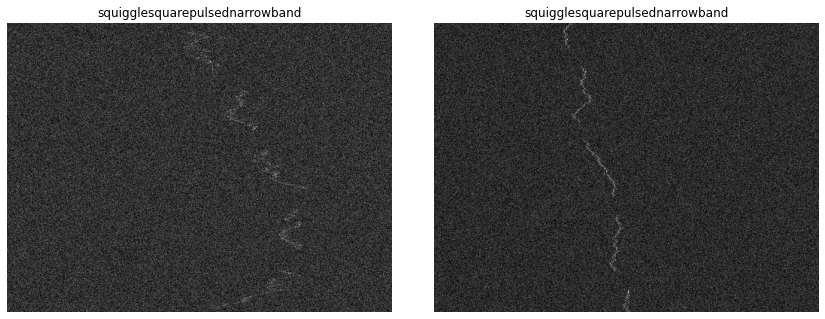

In [13]:
classes = ["brightpixel",
            "narrowband",
            "narrowbanddrd",
            "noise",
            "squarepulsednarrowband",
            "squiggle",
            "squigglesquarepulsednarrowband"]
num_images = 2
for _class in classes:
    # start off by observing images
    path = os.path.join(train, _class)
    image_files = os.listdir(path)
    random_images = random.sample(range(0, len(image_files)-1), num_images)
    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(12, 14), squeeze=False)
    fig.tight_layout()
    for l in range(1):
        for m in range(num_images):
            axes[l][m].imshow(cv2.imread(os.path.join(path, image_files[random_images[m]]), 0), cmap="gray")
            axes[l][m].axis("off")
            axes[l][m].set_title(_class)
# done displaying

### Preparing Training Data

In [41]:
training_data = []
IMG_SIZE = 196

datadir = "../input/seti-data/primary_small/train/"
categories = ["brightpixel","narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                pass
create_training_data()

In [42]:
training_data = np.array(training_data)
print(training_data.shape)

(5600, 2)


In [43]:
import random

np.random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

6
3
2
6
2
0
0
6
1
2


In [44]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(5600, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

ValueError: cannot reshape array of size 860518400 into shape (5600,196,196,3)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
import plotly.graph_objs as go 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

a,b = np.unique(y, return_counts = True)
trace = go.Bar(x = categories, y = b)
data = [trace]
layout = {"title":"Categories vs Images Distribution",
         "xaxis":{"title":"Categories","tickangle":45},
         "yaxis":{"title":"Number of Images"}}
fig = go.Figure(data = data,layout=layout)
iplot(fig)

In [ ]:
X = X/255.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

In [ ]:
print("Shape of test_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_test.shape)
print("Shape of test_y: ",y_test.shape)

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [ ]:
print("Shape of test_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_test.shape)
print("Shape of test_y: ",y_test.shape)

In [ ]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

In [ ]:
model = keras.applications.VGG16(input_shape = (28,28,1), weights = 'imagenet',include_top=False)

for layer in model.layers:
    layer.trainable = False

last_layer = model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)

# add fully-connected & dropout layers
x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation='relu',name='fc-2')(x)
x = Dropout(0.2)(x)

# x = Dense(4096, activation='relu',name='fc-3')(x)
# x = Dropout(0.2)(x)

# a softmax layer for 7 classes
num_classes = 7
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model2 = Model(inputs=model.input, outputs=out)

model2.summary()

In [ ]:
model2.compile(optimizer='adam',
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3)


# hist = model2.fit(X_train,y_train, batch_size=30, epochs = 100, validation_data = (X_test,y_test), callbacks=[early_stopping])
hist = model2.fit(X_train,y_train, batch_size=30, epochs = 30, validation_data = (X_test,y_test))

In [ ]:
# Visualizing the training. 

epochs = 30

# The uncomment everything in this cell and run it.

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])